<a href="https://colab.research.google.com/github/Chia-Wei-Wu/sentiment_PTT_chatgpt/blob/main/techjob_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from pandas import json_normalize
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_frame = pd.DataFrame(columns=["title","author","date","push","url","content"])

In [ ]:
with open('/content/drive/MyDrive/AI_Final/tec_2023.json','r',encoding="utf-8") as read_file:
  lines = read_file.readlines()
  for line in lines:
    data_dic = json.loads(line)
    data_row = pd.DataFrame([data_dic])
    data_frame = pd.concat([data_frame, data_row],ignore_index=True)
#print(data_frame)

In [ ]:
#classification by date
data_frame["date"] = pd.to_datetime(data_frame["date"], format=" %m/%d")
Jan_DF = []
Feb_DF = []
Mar_DF = []
Apr_DF = []
count_jan = 0
count_feb = 0
count_mar = 0
count_apr = 0
for index, row in data_frame.iterrows():
  if row["date"].month == 1:
    Jan_DF.append(row)
    count_jan += 1
  elif row["date"].month == 2:
    Feb_DF.append(row)
    count_feb += 1
  elif row["date"].month == 3:
    Mar_DF.append(row)
    count_mar += 1
  elif row["date"].month == 4:
    Apr_DF.append(row)
    count_apr += 1

In [ ]:
print(count_jan,count_feb,count_mar,count_apr)

415 454 458 416


In [ ]:
bad_word = ["\n","他","的","是","了",'等','如此','來','無','背','碼','元','以及','再者','尤其','%','一個','讓','最','複','僅','據','之道','指出','方面','億','目前','長','這一','總','得','個','以及','將','設','e','旨在','已','仍','鏈','具有','向','需','誠','其','一部分','比','第','寫','像','以來','佈','這些','內','中','成','誰','一些','以','就是','後','一種','哪些','它','由','很','而','較',"在","也","對","與","和","之","為","於","來","有","就","我","不","要","跟","說","都","你",'造',"可以","會","可能","做","但是","沒","但","上",'製']

In [ ]:
#data preprocessing with Jan
content_col_jan = []
for row in Jan_DF:
  content_col_jan.append(row["content"])

result_content_jan = []
for row in content_col_jan:
  row_content_jan = []
  words = jieba.cut(row)
  for word in words:
    word = word.lower()
    row_content_jan.append(word)
  result_content_jan.append(row_content_jan)

#Find "ChatGPT"
having_GPT_jan = []
count_jan_GPT = 0
chatgpt = "chatgpt"
for row in result_content_jan:
  if chatgpt in row:
    having_GPT_jan.append(row)
    count_jan_GPT += 1 

#delete stopword
for bad in bad_word:
  for sublist in having_GPT_jan:
    while bad in sublist:
      sublist.remove(bad)

In [ ]:
#data preprocessing with Feb
content_col_feb = []
for row in Feb_DF:
  content_col_feb.append(row["content"])

result_content_feb = []
for row in content_col_feb:
  row_content_feb = []
  words = jieba.cut(row)
  for word in words:
    word = word.lower()
    row_content_feb.append(word)
  result_content_feb.append(row_content_feb)

#Find "ChatGPT"
having_GPT_feb = []
count_feb_GPT = 0
chatgpt = "chatgpt"
for row in result_content_feb:
  if chatgpt in row:
    having_GPT_feb.append(row)
    count_feb_GPT += 1

#delete stopword
for bad in bad_word:
  for sublist in having_GPT_feb:
    while bad in sublist:
      sublist.remove(bad)

In [ ]:
#data preprocessing with mar
content_col_mar = []
for row in Mar_DF:
  content_col_mar.append(row["content"])

result_content_mar = []
for row in content_col_mar:
  row_content_mar = []
  words = jieba.cut(row)
  for word in words:
    word = word.lower()
    row_content_mar.append(word)
  result_content_mar.append(row_content_mar)

#Find "ChatGPT"
having_GPT_mar = []
count_mar_GPT = 0
chatgpt = "chatgpt"
for row in result_content_mar:
  if chatgpt in row:
    having_GPT_mar.append(row)
    count_mar_GPT += 1

#delete stopword
for bad in bad_word:
  for sublist in having_GPT_mar:
    while bad in sublist:
      sublist.remove(bad)

In [ ]:
#data preprocessing with apr
content_col_apr = []
for row in Apr_DF:
  content_col_apr.append(row["content"])

result_content_apr = []
for row in content_col_apr:
  row_content_apr = []
  words = jieba.cut(row)
  for word in words:
    word = word.lower()
    row_content_apr.append(word)
  result_content_apr.append(row_content_apr)

#Find "ChatGPT"
having_GPT_apr = []
count_apr_GPT = 0
chatgpt = "chatgpt"
for row in result_content_mar:
  if chatgpt in row:
    having_GPT_apr.append(row)
    count_apr_GPT += 1

#delete stopword
for bad in bad_word:
  for sublist in having_GPT_apr:
    while bad in sublist:
      sublist.remove(bad)

In [ ]:
# plt 
width=1280
height=1024
bg='white'
angle=0.9
myfont='/content/drive/MyDrive/AI_Final/KAIU.TTF'

# TF-IDF 

In [ ]:
!pip install stanfordcorenlp
!tar xzvf stanford-corenlp-full-2018-02-27.tgz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tar (child): stanford-corenlp-full-2018-02-27.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
Strcontent_col_jan = ",".join(content_col_jan)
Strcontent_col_feb = ",".join(content_col_feb)
Strcontent_col_mar = ",".join(content_col_mar)
Strcontent_col_apr = ",".join(content_col_apr)

In [ ]:
str_ann = '[〔〕；，、。：「『《（」』》）？]|\[. *?\]n'
def filterSentence_v2(str_sent):
    # keep only word
    #step-1: filter 
    str_Filtered = re.sub(str_ann, ' ', str_sent)
    print(str_Filtered)
    return str_Filtered

##   ---Jan---

In [ ]:
Content_LibTime = Strcontent_col_jan
word_result = [item for sublist in having_GPT_jan for item in sublist]
#print(word_result)
text = ' '.join(word_result)

# Compute TF
stat_dict = {}

for token in word_result:
    if token in str_ann :
        continue
    if token in stat_dict:
        stat_dict[token] = stat_dict[token] + 1
    else:
        stat_dict[token] = 1

new_dict = sorted(stat_dict.items(), key=lambda item: item[1], reverse=True)
print('只依TF排序', '-'*50)
print(new_dict)

只依TF排序 --------------------------------------------------
[('ai', 99), ('微軟', 29), ('chatgpt', 25), ('(', 24), (')', 23), ('公司', 22), ('晶片', 21), ('台積電', 18), ('宇宙', 18), ('台積', 17), ('美元', 16), ('google', 15), ('openai', 15), ('使用', 15), ('生成式', 15), ('-', 15), ('技術', 15), ('程式', 15), ('人', 14), ('全球', 14), ('新', 14), ('應用', 14), ('可', 14), ('自動化', 14), ('客戶', 13), ('工作', 13), ('機器', 13), ('更', 13), ('科技', 12), ('--', 12), ('人工智慧', 12), ('年', 11), ('企業', 11), ('5', 11), ('投資', 11), ('領域', 11), ('工具', 10), ('例如', 10), ('數據', 10), ('或', 10), ('透過', 10), ('—', 10), ('因為', 9), ('分析', 9), ('奈米', 9), ('聊天', 9), ('到', 9), ('3', 8), (':', 8), ('／', 8), ('超微', 8), ('程', 8), ('採用', 8), ('表示', 8), ('系統', 8), ('因此', 8), ('模型', 8), ('語言', 8), ('2023', 7), ('問題', 7), ('市場', 7), ('影響', 7), ('資料', 7), ('工程', 7), ('/', 7), ('其他', 7), ('傳統', 7), ('未來', 7), ('語音', 7), ('裁員', 6), ('alphabet', 6), ('亞馬遜', 6), ('營收', 6), ('報導', 6), ('服務', 6), ('創造', 6), ('月', 6), ('今年', 6), ('主要', 6), ('輝達', 6), ('積電', 6),

In [ ]:
# Compute IDF
corpus_list = [Strcontent_col_jan, Strcontent_col_feb, Strcontent_col_mar, Strcontent_col_apr]

idf_dict={}
N=len(corpus_list)
for key in stat_dict:
    count=0
    for sen in corpus_list:
        if key in sen.split():
            count=count+1
        idf_dict[key]= math.log10(N / (float(count) + 1))

print('只依IDF排序', '-'*50)
new_dict = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
print(new_dict)

只依IDF排序 --------------------------------------------------
[('不尋常', 0.6020599913279624), ('全為', 0.6020599913279624), ('備戰', 0.6020599913279624), ('chatgpt', 0.6020599913279624), ('值得', 0.6020599913279624), ('關注', 0.6020599913279624), ('正值', 0.6020599913279624), ('人們', 0.6020599913279624), ('歡喜', 0.6020599913279624), ('迎接', 0.6020599913279624), ('兔年', 0.6020599913279624), ('除夕夜', 0.6020599913279624), ('前夕', 0.6020599913279624), ('alphabet', 0.6020599913279624), ('一紙', 0.6020599913279624), ('內部', 0.6020599913279624), ('信震', 0.6020599913279624), ('驚', 0.6020599913279624), ('整個', 0.6020599913279624), ('矽谷', 0.6020599913279624), ('sundar', 0.6020599913279624), ('pichai', 0.6020599913279624), ('宣', 0.6020599913279624), ('計畫', 0.6020599913279624), ('000', 0.6020599913279624), ('即便', 0.6020599913279624), ('下半年', 0.6020599913279624), ('科技', 0.6020599913279624), ('而言', 0.6020599913279624), ('家常', 0.6020599913279624), ('便飯', 0.6020599913279624), ('臉書', 0.6020599913279624), ('宣布', 0.60205999132796

In [ ]:
# Compute TF-IDF
tfidf_dict = {}

for key in stat_dict:
    tfidf_dict[key] = stat_dict[key]*idf_dict[key]

new_dict = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print('依TF-IDF排序', '-'*50)
print(new_dict)

依TF-IDF排序 --------------------------------------------------
[('ai', 29.801969570734137), ('chatgpt', 15.05149978319906), ('宇宙', 10.837079843903323), ('openai', 9.030899869919436), ('使用', 9.030899869919436), ('生成式', 9.030899869919436), ('全球', 8.428839878591473), ('應用', 8.428839878591473), ('自動化', 8.428839878591473), ('客戶', 7.826779887263511), ('機器', 7.826779887263511), ('科技', 7.224719895935548), ('人工智慧', 7.224719895935548), ('投資', 6.622659904607587), ('領域', 6.622659904607587), ('晶片', 6.321629908943605), ('透過', 6.020599913279624), ('因為', 5.418539921951662), ('分析', 5.418539921951662), ('聊天', 5.418539921951662), ('台積', 5.11750992628768), ('美元', 4.816479930623699), ('／', 4.816479930623699), ('超微', 4.816479930623699), ('採用', 4.816479930623699), ('系統', 4.816479930623699), ('模型', 4.816479930623699), ('語言', 4.816479930623699), ('技術', 4.515449934959718), ('程式', 4.515449934959718), ('問題', 4.214419939295737), ('市場', 4.214419939295737), ('新', 4.214419939295737), ('影響', 4.214419939295737), ('資料', 4

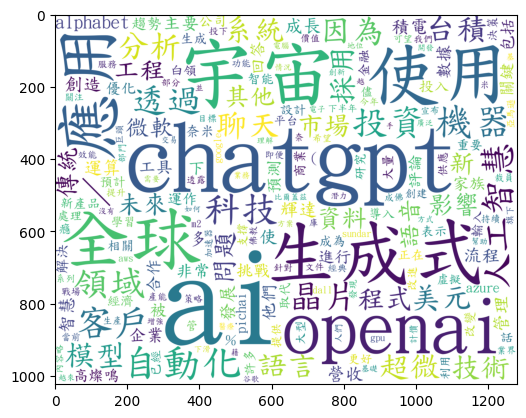

In [ ]:
dict_text = dict(new_dict)
cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate_from_frequencies(dict_text)

plt.imshow(cloud)

## ---Feb---

In [ ]:
Content_LibTime = Strcontent_col_feb
word_result = [item for sublist in having_GPT_feb for item in sublist]
#print(word_result)
text = ' '.join(word_result)

# Compute TF
stat_dict = {}

for token in word_result:
    if token in str_ann :
        continue
    if token in stat_dict:
        stat_dict[token] = stat_dict[token] + 1
    else:
        stat_dict[token] = 1

new_dict = sorted(stat_dict.items(), key=lambda item: item[1], reverse=True)
print('只依TF排序', '-'*50)
print(new_dict)

只依TF排序 --------------------------------------------------
[('ai', 129), ('chatgpt', 68), ('--', 40), ('公司', 39), ('人', 39), ('醫生', 39), ('模型', 32), ('取代', 32), ('問題', 31), ('科技', 30), ('人類', 30), ('工作', 28), ('到', 27), ('技術', 25), ('機器', 23), ('所以', 23), ('因為', 21), ('工程', 21), ('-', 20), ('年', 20), ('表示', 19), ('不是', 19), ('更', 19), ('去', 19), ('用', 18), ('新', 18), ('月', 18), ('自己', 18), ('再', 18), ('美元', 18), ('好', 18), ('google', 17), ('或', 17), ('多', 17), ('(', 17), (')', 17), ('還是', 17), ('能力', 17), ('我們', 17), ('電腦', 17), ('討論', 16), ('這個', 16), ('從', 16), ('to', 16), (':', 15), ('程式', 15), ('人工智慧', 14), ('語言', 14), ('工具', 14), ('and', 14), ('一樣', 14), ('需要', 14), ('不會', 14), ('/', 14), ('llm', 14), ('能', 14), ('真的', 14), ('研究', 13), ('百度', 13), ('進行', 13), ('2', 13), ('生成式', 13), ('話', 13), ('使用', 13), ('萬', 13), ('未來', 13), ('被', 13), ('不過', 13), ('醫學', 13), ('只是', 13), ('2023', 12), ('功能', 12), ('這樣', 12), (',', 12), ('想', 12), ('3', 12), ('才', 12), ('領域', 12), ('新創', 12), ('其

In [ ]:
# Compute IDF
corpus_list = [Strcontent_col_jan, Strcontent_col_feb, Strcontent_col_mar, Strcontent_col_apr]

idf_dict={}
N=len(corpus_list)
for key in stat_dict:
    count=0
    for sen in corpus_list:
        if key in sen.split():
            count=count+1
        idf_dict[key]= math.log10(N / (float(count) + 1))

print('只依IDF排序', '-'*50)
new_dict = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
print(new_dict)

只依IDF排序 --------------------------------------------------
[('參戰', 0.6020599913279624), ('chatgpt', 0.6020599913279624), ('科技', 0.6020599913279624), ('巨頭', 0.6020599913279624), ('拚場', 0.6020599913279624), ('26', 0.6020599913279624), ('00', 0.6020599913279624), ('經濟', 0.6020599913279624), ('日報', 0.6020599913279624), ('／', 0.6020599913279624), ('蕭君暉', 0.6020599913279624), ('宣布', 0.6020599913279624), ('人工智慧', 0.6020599913279624), ('大型', 0.6020599913279624), ('語言', 0.6020599913279624), ('模型', 0.6020599913279624), ('llama', 0.6020599913279624), ('研究', 0.6020599913279624), ('相關', 0.6020599913279624), ('應用', 0.6020599913279624), ('本報', 0.6020599913279624), ('系資料', 0.6020599913279624), ('庫', 0.6020599913279624), ('社群', 0.6020599913279624), ('媒體', 0.6020599913279624), ('臉書', 0.6020599913279624), ('研', 0.6020599913279624), ('究相關', 0.6020599913279624), ('並嘗試', 0.6020599913279624), ('行列', 0.6020599913279624), ('掀起', 0.6020599913279624), ('大戰中', 0.6020599913279624), ('創造', 0.6020599913279624), ('話題

In [ ]:
# Compute TF-IDF
tfidf_dict = {}

for key in stat_dict:
    tfidf_dict[key] = stat_dict[key]*idf_dict[key]

new_dict = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print('依TF-IDF排序', '-'*50)
print(new_dict)

依TF-IDF排序 --------------------------------------------------
[('chatgpt', 40.94007941030144), ('ai', 38.832869440653575), ('醫生', 23.480339661790534), ('模型', 19.265919722494797), ('取代', 19.265919722494797), ('問題', 18.663859731166834), ('科技', 18.06179973983887), ('機器', 13.847379800543136), ('因為', 12.64325981788721), ('工程', 12.64325981788721), ('自己', 10.837079843903323), ('多', 10.23501985257536), ('我們', 10.23501985257536), ('電腦', 10.23501985257536), ('討論', 9.632959861247398), ('人類', 9.030899869919436), ('人工智慧', 8.428839878591473), ('語言', 8.428839878591473), ('需要', 8.428839878591473), ('不會', 8.428839878591473), ('llm', 8.428839878591473), ('能', 8.428839878591473), ('研究', 7.826779887263511), ('百度', 7.826779887263511), ('進行', 7.826779887263511), ('生成式', 7.826779887263511), ('話', 7.826779887263511), ('使用', 7.826779887263511), ('萬', 7.826779887263511), ('未來', 7.826779887263511), ('被', 7.826779887263511), ('醫學', 7.826779887263511), ('只是', 7.826779887263511), ('技術', 7.52574989159953), ('功能', 7.2

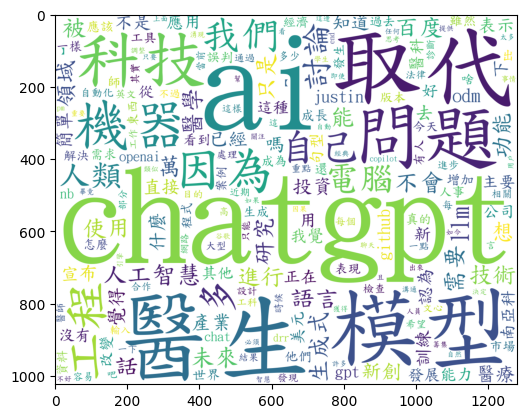

In [ ]:
dict_text = dict(new_dict)
cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate_from_frequencies(dict_text)

plt.imshow(cloud)

## --Mar---

In [ ]:
Content_LibTime = Strcontent_col_mar
word_result = [item for sublist in having_GPT_mar for item in sublist]
#print(word_result)
text = ' '.join(word_result)

# Compute TF
stat_dict = {}

for token in word_result:
    if token in str_ann :
        continue
    if token in stat_dict:
        stat_dict[token] = stat_dict[token] + 1
    else:
        stat_dict[token] = 1

new_dict = sorted(stat_dict.items(), key=lambda item: item[1], reverse=True)
print('只依TF排序', '-'*50)
print(new_dict)

只依TF排序 --------------------------------------------------
[('ai', 105), ('晶片', 48), ('chatgpt', 33), ('年', 31), ('-', 29), ('4', 25), ('gpt', 23), ('人', 22), ('美元', 20), ('人工智慧', 19), ('美國', 18), ('技術', 18), ('公司', 17), ('--', 17), ('科技', 14), ('伺服器', 14), ('表示', 13), ('相關', 12), ('應用', 12), ('更', 12), ('成長', 12), ('新', 12), ('2023', 11), ('到', 11), ('數據', 11), ('需求', 11), ('下', 11), ('推出', 11), ('發展', 11), ('至', 11), ('韓國', 11), ('資料', 10), ('聊天', 10), ('機器', 10), ('投資', 10), ('openai', 10), ('工程', 10), ('可', 10), ('使用', 10), ('模型', 10), ('全球', 10), ('/', 9), ('訓練', 9), ('今年', 9), ('2', 9), ('自己', 9), ('鴻海', 9), ('劉揚偉', 9), ('電池', 9), ('服務', 9), ('無法', 8), ('提供', 8), ('月', 8), ('包括', 8), ('版本', 8), ('數位', 8), ('明年', 8), ('大陸', 8), ('科學家', 8), ('領域', 8), ('億元', 8), ('張天豪', 8), (':', 7), ('台灣', 7), ('市場', 7), ('營收', 7), ('預計', 7), ('正在', 7), ('多', 7), ('趨勢', 7), ('區塊', 7), ('能力', 7), ('設備', 7), ('支出', 7), ('半導體', 7), ('其中', 7), ('透過', 7), ('1', 7), ('約', 7), ('耐能', 7), ('投入', 7), ('研發',

In [ ]:
# Compute IDF
corpus_list = [Strcontent_col_jan, Strcontent_col_feb, Strcontent_col_mar, Strcontent_col_apr]

idf_dict={}
N=len(corpus_list)
for key in stat_dict:
    count=0
    for sen in corpus_list:
        if key in sen.split():
            count=count+1
        idf_dict[key]= math.log10(N / (float(count) + 1))

print('只依IDF排序', '-'*50)
new_dict = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
print(new_dict)

只依IDF排序 --------------------------------------------------
[('劉德音', 0.6020599913279624), ('首度', 0.6020599913279624), ('對美', 0.6020599913279624), ('法案', 0.6020599913279624), ('表態', 0.6020599913279624), ('有些', 0.6020599913279624), ('條件', 0.6020599913279624), ('沒法', 0.6020599913279624), ('接受', 0.6020599913279624), ('05', 0.6020599913279624), ('經濟', 0.6020599913279624), ('日報', 0.6020599913279624), ('尹慧中', 0.6020599913279624), ('／', 0.6020599913279624), ('昨日', 0.6020599913279624), ('以台灣', 0.6020599913279624), ('半導', 0.6020599913279624), ('體產業', 0.6020599913279624), ('協會', 0.6020599913279624), ('tsia', 0.6020599913279624), ('理事', 0.6020599913279624), ('身分', 0.6020599913279624), ('出席', 0.6020599913279624), ('會員大會', 0.6020599913279624), ('釋出', 0.6020599913279624), ('訊息', 0.6020599913279624), ('未', 0.6020599913279624), ('透露', 0.6020599913279624), ('美方', 0.6020599913279624), ('無法', 0.6020599913279624), ('我們', 0.6020599913279624), ('直接', 0.6020599913279624), ('美國談', 0.6020599913279624), ('強調', 0.

In [ ]:
# Compute TF-IDF
tfidf_dict = {}

for key in stat_dict:
    tfidf_dict[key] = stat_dict[key]*idf_dict[key]

new_dict = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print('依TF-IDF排序', '-'*50)
print(new_dict)

依TF-IDF排序 --------------------------------------------------
[('ai', 31.608149544718025), ('chatgpt', 19.86797971382276), ('晶片', 14.449439791871097), ('gpt', 13.847379800543136), ('人工智慧', 11.439139835231286), ('科技', 8.428839878591473), ('伺服器', 8.428839878591473), ('相關', 7.224719895935548), ('應用', 7.224719895935548), ('成長', 7.224719895935548), ('需求', 6.622659904607587), ('下', 6.622659904607587), ('發展', 6.622659904607587), ('資料', 6.020599913279624), ('聊天', 6.020599913279624), ('機器', 6.020599913279624), ('美元', 6.020599913279624), ('投資', 6.020599913279624), ('openai', 6.020599913279624), ('工程', 6.020599913279624), ('使用', 6.020599913279624), ('模型', 6.020599913279624), ('全球', 6.020599913279624), ('訓練', 5.418539921951662), ('技術', 5.418539921951662), ('自己', 5.418539921951662), ('劉揚偉', 5.418539921951662), ('電池', 5.418539921951662), ('無法', 4.816479930623699), ('提供', 4.816479930623699), ('包括', 4.816479930623699), ('版本', 4.816479930623699), ('數位', 4.816479930623699), ('明年', 4.816479930623699), ('科

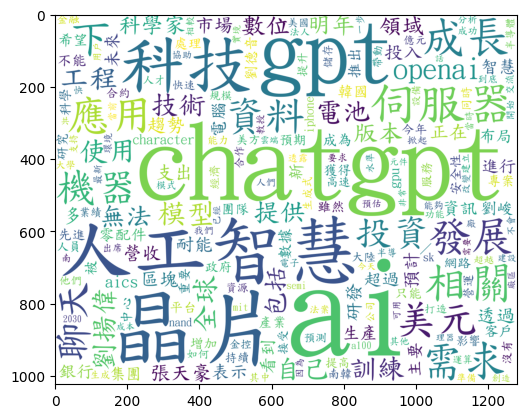

In [ ]:
dict_text = dict(new_dict)
cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate_from_frequencies(dict_text)

plt.imshow(cloud)

## ---Apr---

In [ ]:
Content_LibTime = Strcontent_col_apr
word_result = [item for sublist in having_GPT_apr for item in sublist]
#print(word_result)
text = ' '.join(word_result)

# Compute TF
stat_dict = {}

for token in word_result:
    if token in str_ann :
        continue
    if token in stat_dict:
        stat_dict[token] = stat_dict[token] + 1
    else:
        stat_dict[token] = 1

new_dict = sorted(stat_dict.items(), key=lambda item: item[1], reverse=True)
print('只依TF排序', '-'*50)
print(new_dict)

只依TF排序 --------------------------------------------------
[('ai', 105), ('晶片', 48), ('chatgpt', 33), ('年', 31), ('-', 29), ('4', 25), ('gpt', 23), ('人', 22), ('美元', 20), ('人工智慧', 19), ('美國', 18), ('技術', 18), ('公司', 17), ('--', 17), ('科技', 14), ('伺服器', 14), ('表示', 13), ('相關', 12), ('應用', 12), ('更', 12), ('成長', 12), ('新', 12), ('2023', 11), ('到', 11), ('數據', 11), ('需求', 11), ('下', 11), ('推出', 11), ('發展', 11), ('至', 11), ('韓國', 11), ('資料', 10), ('聊天', 10), ('機器', 10), ('投資', 10), ('openai', 10), ('工程', 10), ('可', 10), ('使用', 10), ('模型', 10), ('全球', 10), ('/', 9), ('訓練', 9), ('今年', 9), ('2', 9), ('自己', 9), ('鴻海', 9), ('劉揚偉', 9), ('電池', 9), ('服務', 9), ('無法', 8), ('提供', 8), ('月', 8), ('包括', 8), ('版本', 8), ('數位', 8), ('明年', 8), ('大陸', 8), ('科學家', 8), ('領域', 8), ('億元', 8), ('張天豪', 8), (':', 7), ('台灣', 7), ('市場', 7), ('營收', 7), ('預計', 7), ('正在', 7), ('多', 7), ('趨勢', 7), ('區塊', 7), ('能力', 7), ('設備', 7), ('支出', 7), ('半導體', 7), ('其中', 7), ('透過', 7), ('1', 7), ('約', 7), ('耐能', 7), ('投入', 7), ('研發',

In [ ]:
# Compute IDF
corpus_list = [Strcontent_col_jan, Strcontent_col_feb, Strcontent_col_mar, Strcontent_col_apr]

idf_dict={}
N=len(corpus_list)
for key in stat_dict:
    count=0
    for sen in corpus_list:
        if key in sen.split():
            count=count+1
        idf_dict[key]= math.log10(N / (float(count) + 1))

print('只依IDF排序', '-'*50)
new_dict = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
print(new_dict)

只依IDF排序 --------------------------------------------------
[('劉德音', 0.6020599913279624), ('首度', 0.6020599913279624), ('對美', 0.6020599913279624), ('法案', 0.6020599913279624), ('表態', 0.6020599913279624), ('有些', 0.6020599913279624), ('條件', 0.6020599913279624), ('沒法', 0.6020599913279624), ('接受', 0.6020599913279624), ('05', 0.6020599913279624), ('經濟', 0.6020599913279624), ('日報', 0.6020599913279624), ('尹慧中', 0.6020599913279624), ('／', 0.6020599913279624), ('昨日', 0.6020599913279624), ('以台灣', 0.6020599913279624), ('半導', 0.6020599913279624), ('體產業', 0.6020599913279624), ('協會', 0.6020599913279624), ('tsia', 0.6020599913279624), ('理事', 0.6020599913279624), ('身分', 0.6020599913279624), ('出席', 0.6020599913279624), ('會員大會', 0.6020599913279624), ('釋出', 0.6020599913279624), ('訊息', 0.6020599913279624), ('未', 0.6020599913279624), ('透露', 0.6020599913279624), ('美方', 0.6020599913279624), ('無法', 0.6020599913279624), ('我們', 0.6020599913279624), ('直接', 0.6020599913279624), ('美國談', 0.6020599913279624), ('強調', 0.

In [ ]:
# Compute TF-IDF
tfidf_dict = {}

for key in stat_dict:
    tfidf_dict[key] = stat_dict[key]*idf_dict[key]

new_dict = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print('依TF-IDF排序', '-'*50)
print(new_dict)

依TF-IDF排序 --------------------------------------------------
[('ai', 31.608149544718025), ('chatgpt', 19.86797971382276), ('晶片', 14.449439791871097), ('gpt', 13.847379800543136), ('人工智慧', 11.439139835231286), ('科技', 8.428839878591473), ('伺服器', 8.428839878591473), ('相關', 7.224719895935548), ('應用', 7.224719895935548), ('成長', 7.224719895935548), ('需求', 6.622659904607587), ('下', 6.622659904607587), ('發展', 6.622659904607587), ('資料', 6.020599913279624), ('聊天', 6.020599913279624), ('機器', 6.020599913279624), ('美元', 6.020599913279624), ('投資', 6.020599913279624), ('openai', 6.020599913279624), ('工程', 6.020599913279624), ('使用', 6.020599913279624), ('模型', 6.020599913279624), ('全球', 6.020599913279624), ('訓練', 5.418539921951662), ('技術', 5.418539921951662), ('自己', 5.418539921951662), ('劉揚偉', 5.418539921951662), ('電池', 5.418539921951662), ('無法', 4.816479930623699), ('提供', 4.816479930623699), ('包括', 4.816479930623699), ('版本', 4.816479930623699), ('數位', 4.816479930623699), ('明年', 4.816479930623699), ('科

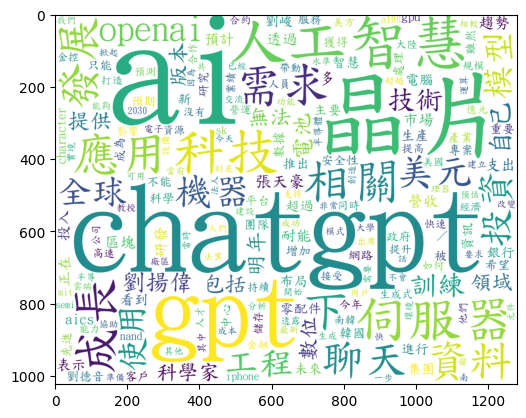

In [ ]:
dict_text = dict(new_dict)
cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate_from_frequencies(dict_text)

plt.imshow(cloud)